In [51]:
# Importation of necessary libraries
import fasttext
import emoji
from bs4 import BeautifulSoup
import itertools
import datetime
import nltk
import re
import csv
import sys
import os


In [1]:
# Library for smiley conversions and contraction conversion
def load_dict_smilies():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

def remove_accents(text):
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def clean_tweets(tweet):
    # Remove HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    # Web Address removal
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    # Removing Hashtags and accounts
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    # Punctuation removal
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    # Make lower case
    tweet = tweet.lower()
    
    # Contraction simplification
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    # Word generation from tweets using regex
    words = tweet.split()
    removed_contractions = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(removed_contractions)
    
    # Using Itertools to standardize words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    
    # Smiley Removal
    SMILIES = load_dict_smileys()  
    words = tweet.split()
    removed_smilies = [SMILIES[word] if word in SMILIES else word for word in words]
    tweet = " ".join(removed_smilies)
    
    # Emoji Removal
    tweet = emoji.demojize(tweet)
    
    tweet= remove_accents(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    
    # Not Removing stop words for sentiment analysis as they can contribute
    return tweet

def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [57]:
# Data Preprocessing
def transform_instance(row, label):
    cur_row = []
    #Prefix the index-ed label with __label__
    label = "__label__" + label 
    cur_row.append(label)
    cur_row.extend(nltk.word_tokenize(clean_tweets(row[9].lower())))
    return cur_row


def preprocess(input_file, output_file, country):
    i=0
    with open(output_file, 'w') as csvoutfile:
        csv_writer = csv.writer(csvoutfile, delimiter=' ', lineterminator='\n')
        with open(input_file, 'r', newline='', encoding='latin1') as csvinfile: 
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                if isfloat(row[12]) and row[1] == country:
                    # Comparing against VADAR sentiment analysis for scoring
                    if float(row[12]) > -.25 and float(row[12]) < .25: 
                        row_output = transform_instance(row, 'NEURTRAL')
                        csv_writer.writerow(row_output )
                    elif float(row[12]) >= .25:
                        row_output = transform_instance(row, 'POSITIVE')
                        csv_writer.writerow(row_output )
                    elif float(row[12]) <= -.25:
                        row_output = transform_instance(row, 'NEGATIVE')
                        csv_writer.writerow(row_output )
                i=i+1
                if i%10000 ==0:
                    print(i)                    
                    
# Preparing the training dataset - more countries and monthes can be added for analysis        
preprocess('07_2020.csv', 'tweets_Japan.07', 'Japan')
preprocess('07_2020.csv', 'tweets_USA.07', 'USA')
preprocess('07_2020.csv', 'tweets_China.07', 'China')
preprocess('07_2020.csv', 'tweets_Greece.07', 'Greece')
preprocess('07_2020.csv', 'tweets_Italy.07', 'Italy')

preprocess('08_2020.csv', 'tweets_Japan.08', 'Japan')
preprocess('08_2020.csv', 'tweets_USA.08', 'USA')
preprocess('08_2020.csv', 'tweets_China.08', 'China')
preprocess('08_2020.csv', 'tweets_Greece.08', 'Greece')
preprocess('08_2020.csv', 'tweets_Italy.08', 'Italy')

preprocess('09_2020.csv', 'tweets_Japan.09', 'Japan')
preprocess('09_2020.csv', 'tweets_USA.09', 'USA')
preprocess('09_2020.csv', 'tweets_China.09', 'China')
preprocess('09_2020.csv', 'tweets_Greece.09', 'Greece')
preprocess('09_2020.csv', 'tweets_Italy.09', 'Italy')

preprocess('10_2020.csv', 'tweets_Japan.10', 'Japan')
preprocess('10_2020.csv', 'tweets_USA.10', 'USA')
preprocess('10_2020.csv', 'tweets_China.10', 'China')
preprocess('10_2020.csv', 'tweets_Greece.10', 'Greece')
preprocess('10_2020.csv', 'tweets_Italy.10', 'Italy')

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000

2360000
2370000
2380000
2390000
2400000
2410000
2420000
2430000
2440000
2450000
2460000
2470000
2480000
2490000
2500000
2510000
2520000
2530000
2540000
2550000
2560000
2570000
2580000
2590000
2600000
2610000
2620000
2630000
2640000
2650000
2660000
2670000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070

1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160

In [5]:
# DeSampling
def desampling(input_file, output_file, ratio_desampling=1):
    #    Create a file with equal number of tweets for each label to account for class imbalance
    #    input_file: path to file
    #    output_file: path to the output file
    #    ratio_desampling: ratio of each minority classes vs majority one. 1 means majority = minority classes
    
    i=0
    counts = {}
    dict_label = {}

    # GET LABEL LIST AND GET DATA PER LABEL
    with open(input_file, 'r', newline='') as csvinfile: 
        csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
        for row in csv_reader:
            counts[row[0].split()[0]] = counts.get(row[0].split()[0], 0) + 1
            if not row[0].split()[0] in dict_label:
                dict_label[row[0].split()[0]]=[row[0]]
            else:
                dict_label[row[0].split()[0]].append(row[0])
            i=i+1
            if i%10000 ==0:
                print("read" + str(i))

    # FIND MAJORITY CLASS
    majority_class=""
    count_majority_class=0
    for item in dict_label:
        if len(dict_label[item])>count_majority_class:
            majority_class= item
            count_majority_class=len(dict_label[item])  
    
    # UPSAMPLE MINORITY CLASS
    data_upsampled=[]
    for item in dict_label:
        data_upsampled.extend(dict_label[item])
        if item != majority_class:
            items_added=0
            items_to_add = count_majority_class - len(dict_label[item])
            while items_added<items_to_add:
                data_upsampled.extend(dict_label[item][:max(0,min(items_to_add-items_added,len(dict_label[item])))])
                items_added = items_added + max(0,min(items_to_add-items_added,len(dict_label[item])))

    # WRITE ALL
    i=0

    with open(output_file, 'w') as txtoutfile:
        for row in data_upsampled:
            txtoutfile.write(row+ '\n' )
            i=i+1
            if i%10000 ==0:
                print("writer" + str(i))

                
# Only doing Sampling Balance over Month 07 for initial training
desampling('tweets_Japan.07', 'uptweets_Japan.07')
desampling('tweets_China.07', 'uptweets_China.07')
desampling('tweets_USA.07', 'uptweets_USA.07')
desampling('tweets_Italy.07', 'uptweets_Italy.07')
desampling('tweets_Greece.07', 'uptweets_Greece.07')

desampling('tweets_Japan.08', 'uptweets_Japan.08')
desampling('tweets_China.08', 'uptweets_China.08')
desampling('tweets_USA.08', 'uptweets_USA.08')
desampling('tweets_Italy.08', 'uptweets_Italy.08')
desampling('tweets_Greece.08', 'uptweets_Greece.08')

desampling('tweets_Japan.09', 'uptweets_Japan.09')
desampling('tweets_China.09', 'uptweets_China.09')
desampling('tweets_USA.09', 'uptweets_USA.09')
desampling('tweets_Italy.09', 'uptweets_Italy.09')
desampling('tweets_Greece.09','uptweets_Greece.09')

read10000
read20000
writer10000
writer20000
writer30000
read10000
read20000
writer10000
writer20000
read10000
read20000
writer10000
writer20000
read10000
writer10000
writer20000
read10000
writer10000
writer20000
read10000
read20000
read30000
read40000
writer10000
writer20000
writer30000
writer40000
writer50000
writer60000
writer70000
read10000
read20000
read30000
read40000
read50000
writer10000
writer20000
writer30000
writer40000
writer50000
writer60000
read10000
read20000
read30000
read40000
read50000
writer10000
writer20000
writer30000
writer40000
writer50000
writer60000
read10000
read20000
read30000
writer10000
writer20000
writer30000
writer40000
writer50000
read10000
read20000
read30000
read40000
writer10000
writer20000
writer30000
writer40000
writer50000
read10000
read20000
read30000
writer10000
writer20000
writer30000
writer40000
writer50000
read10000
read20000
read30000
read40000
writer10000
writer20000
writer30000
writer40000
read10000
read20000
read30000
read40000
writer10000


In [50]:
# Training
# training data.
model_path =''
#model_name="model-en" (example)

def train(training_data_path, validation_data_path, model_name):
    print('Training...')
    
    try:
        hyper_params = {"lr": 0.01,
                        "epoch": 20,
                        "wordNgrams": 2,
                        "dim": 20}     
        
        print(str(datetime.datetime.now()) + ' START=>' + str(hyper_params) )
    
        # Train
        model = fasttext.train_supervised(input=training_data_path, **hyper_params)
        print("Model trained with the hyperparameter \n {}".format(hyper_params))

        # Performance
        print(str(datetime.datetime.now()) + 'Training complete.' + str(hyper_params) )
        
        model_acc_training_set = model.test(training_data_path)
        model_label_validation_set = model.test_label(validation_data_path)
        model_acc_validation_set = model.test(validation_data_path)
        
        # Print Accuracy
        text_line = str(hyper_params) + ",Accuracy:" + str(model_acc_training_set[1])  + ", Validation:" + str(model_acc_validation_set[1]) + '\n' 
        print(text_line)
        print("Individual Label Accuracy: {}", model_label_validation_set)
        
        #quantize
        model.quantize(input=training_data_path, qnorm=True, retrain=True, cutoff=100000)
        
        print("Quantized the model")
        model.save_model(os.path.join(model_path,model_name + ".ftz"))                
    
        #Testing
        model.predict(['why not'],k=3)
        model.predict(['this player is so bad'],k=1)
        
    except Exception as e:
        print('Exception during training: ' + str(e) )

In [52]:
def country_test(country):
    
    print(country+ " TEST: 07")
    train('tweets_' + country + '.07', 'tweets_' + country + '.08', "model-" + country + "07-1")
    train('tweets_' + country + '.07', 'tweets_' + country + '.09', "model-" + country + "07-2")
    train('tweets_' + country + '.07', 'tweets_' + country + '.10', "model-" + country + "07-3")

    print(country + " TEST: 08")
    train('tweets_' + country + '.08', 'tweets_' + country + '.09', "model-" + country + "08-1")
    train('tweets_' + country + '.08', 'tweets_' + country + '.10', "model-" + country + "08-2")

    print(country + " TEST: 09")
    train('tweets_' + country + '.09', 'tweets_' + country + '.10', "model-" + country + "09-1")

In [53]:
country_test("USA")

USA TEST: 07
Training...
2021-04-03 19:03:46.993252 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:03:47.794675Training complete.{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},Accuracy:0.8371083919118285, Validation:0.6549984106802289

Individual Label Accuracy: {} {'__label__NEURTRAL': {'precision': 0.6405642940666139, 'recall': nan, 'f1score': 1.2811285881332277}, '__label__NEGATIVE': {'precision': 0.6116527663573358, 'recall': nan, 'f1score': 1.2233055327146716}, '__label__POSITIVE': {'precision': 0.7040882967607106, 'recall': nan, 'f1score': 1.4081765935214212}}
Quantized the model
Training...
2021-04-03 19:03:59.481868 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:04:00.188103Trai

In [54]:
country_test("Japan")

Japan TEST: 07
Training...
2021-04-03 19:05:14.968665 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:05:15.666557Training complete.{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},Accuracy:0.9251277207744816, Validation:0.7131449117819215

Individual Label Accuracy: {} {'__label__NEURTRAL': {'precision': 0.7192279033459887, 'recall': nan, 'f1score': 1.4384558066919775}, '__label__NEGATIVE': {'precision': 0.7994219653179191, 'recall': nan, 'f1score': 1.5988439306358382}, '__label__POSITIVE': {'precision': 0.6952519109524076, 'recall': nan, 'f1score': 1.3905038219048151}}
Quantized the model
Training...
2021-04-03 19:05:27.522406 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:05:28.212522Tr

In [55]:
country_test("China")

China TEST: 07
Training...
2021-04-03 19:06:31.633553 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:06:32.441597Training complete.{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},Accuracy:0.902152466367713, Validation:0.5828877005347594

Individual Label Accuracy: {} {'__label__NEURTRAL': {'precision': 0.5791303711294927, 'recall': nan, 'f1score': 1.1582607422589855}, '__label__POSITIVE': {'precision': 0.5988481779366498, 'recall': nan, 'f1score': 1.1976963558732996}, '__label__NEGATIVE': {'precision': 0.5790550349742642, 'recall': nan, 'f1score': 1.1581100699485285}}
Quantized the model
Training...
2021-04-03 19:06:44.250234 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:06:44.952229Tra

In [56]:
country_test("Italy")

Italy TEST: 07
Training...
2021-04-03 19:07:51.751480 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:07:52.347442Training complete.{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},Accuracy:0.9325508687407104, Validation:0.7299584883282118

Individual Label Accuracy: {} {'__label__NEGATIVE': {'precision': 0.5587544065804936, 'recall': nan, 'f1score': 1.1175088131609872}, '__label__POSITIVE': {'precision': 0.7289706402546869, 'recall': nan, 'f1score': 1.4579412805093739}, '__label__NEURTRAL': {'precision': 0.7443205869902638, 'recall': nan, 'f1score': 1.4886411739805276}}
Quantized the model
Training...
2021-04-03 19:08:03.908025 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:08:04.538397Tr

In [57]:
country_test("Greece")

Greece TEST: 07
Training...
2021-04-03 19:09:05.318436 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:09:05.907736Training complete.{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20},Accuracy:0.9194115765909817, Validation:0.6271790716518115

Individual Label Accuracy: {} {'__label__NEURTRAL': {'precision': 0.6297743977567235, 'recall': nan, 'f1score': 1.259548795513447}, '__label__NEGATIVE': {'precision': 0.579088471849866, 'recall': nan, 'f1score': 1.158176943699732}, '__label__POSITIVE': {'precision': 0.6403435854807425, 'recall': nan, 'f1score': 1.280687170961485}}
Quantized the model
Training...
2021-04-03 19:09:17.537921 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
2021-04-03 19:09:18.146926Train

C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56814 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56814 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Jordan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56825 missing from

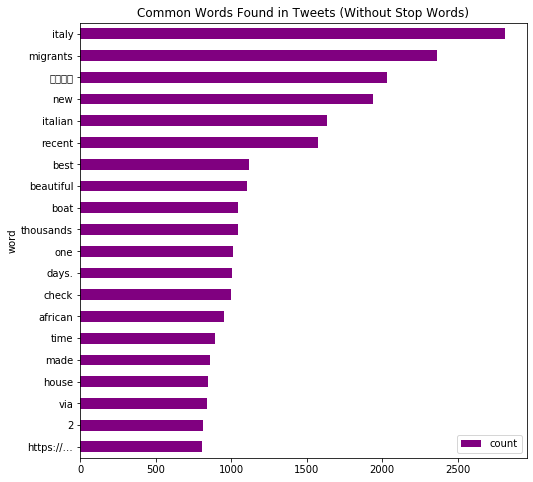

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

def word_freq_generator(dfWordCloud):
    ##Count frequencies of words
    ##Removes the stop words and characters
    stop_words = set(stopwords.words('english'))
    stop_char=['#','@','&']
    stop_words.update(["rt","https","https.","-",'.',':'])
    dfWordCloud
    text = " ".join(tweet.lower() for tweet in dfWordCloud.text)
    all_freq={}
    for word in text.split():
        res = [char for char in stop_char if(char in word)]
        if len(res)==0:
            if word not in stop_words:
                if word in all_freq: 
                    all_freq[word] += 1
                else: 
                    all_freq[word] = 1  
    return all_freq

df=pd.read_csv('08_2020.csv')
dfCountry=df[df['file_name']=='Italy']

all_freq=word_freq_generator(dfCountry)
s = pd.Series(all_freq, name='count')
s.index.name = 'word'
sdf=s.reset_index()
sdf=sdf.sort_values('count',ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
sdf[0:20].sort_values(by='count').plot.barh(x='word',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()